In [27]:
import scipy as sc
from scipy.io import wavfile
from scipy import stats,signal
from scipy.fftpack import fft
from scipy.signal import lfilter, hamming
from scipy.fftpack.realtransforms import dct
from scikits.talkbox import segment_axis
from scikits.talkbox.features import mfcc
import numpy as np

In [12]:
import matplotlib.pyplot as plt
from numpy.lib import stride_tricks

from IPython.display import HTML
from base64 import b64encode

# Classification and evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import StratifiedKFold, ShuffleSplit, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import pandas as pd

/people/berhe/.virtualenvs/Proj_env/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
import wave
from numpy.fft import *
#from numpy import log10,sqrt,array,zeros,ones,mu
import struct
import math
import matplotlib.pyplot as plt

In [18]:
def get_samples(file):
     
    waveFile = wave.open(file, 'r')
    samples = []
 
    # Gets total number of frames
    length = waveFile.getnframes()
     
    # Read them into the frames array
    for i in range(0,length):
        waveData = waveFile.readframes(1)
        data = struct.unpack("%ih"%2, waveData)
         
        # After unpacking, each data array here is actually an array of ints
        # The length of the array depends on the number of channels you have
         
        # Drop to mono channel
        samples.append(int(data[0]))
     
    samples = array(samples)
    return samples

In [20]:
file_audio='/people/berhe/Bureau/Project/TLP_thesis/audio/GameOfThrones.Season01.Episode01.en.raw.wav'
waveFile=wave.open(file_audio)

In [22]:
frames=waveFile.getnframes()

In [24]:
waveData=waveFile.readframes(1)

In [25]:
waveData

'\x00\x00'

In [30]:
def spectrogram(data, segment_size=60):
    end = len(data) - len(data) % segment_size
    stacked = data[:end].reshape((-1, segment_size))
    freq_space = np.fft.fft(stacked)
    real = np.abs(freq_space)
    # fft results are mirrored, this trims the excess
    trimmed = real.T[:segment_size/2, :]
    return trimmed

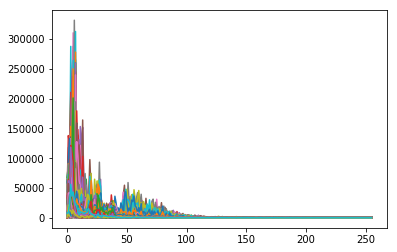

In [37]:
sampling_rate, audio = wavfile.read(file_audio)
#audio = np.sum(audio, 1)  #sum the channels
sample = audio[10000000:10200000]  # ~4.5 second subsample
spec = spectrogram(audio, segment_size=512)
sample_spec = spectrogram(sample, segment_size=512)
plt.plot(sample_spec)


In [47]:
% pylab inline
from __future__ import print_function
import os
import pandas as pd
import librosa
import librosa.display
import glob 

Populating the interactive namespace from numpy and matplotlib


In [48]:
data, sampling_rate = librosa.load(file_audio)

In [46]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)
plt.show()

OverflowError: In draw_markers: Exceeded cell block limit

In [55]:
from IPython.display import Audio

In [50]:
# 1. Get the file path to the included audio example
filename = '/people/berhe/Bureau/Project/TLP_thesis/audio/GameOfThrones.Season01.Episode01.en.raw.wav'
# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
y, sr = librosa.load(filename)

# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

print('Saving output to beat_times.csv')
librosa.output.times_csv('beat_times.csv', beat_times)


Estimated tempo: 117.45 beats per minute
Saving output to beat_times.csv


In [51]:
y_harmonic, y_percussive = librosa.effects.hpss(y)

In [52]:
y_harmonic.shape

(78183303,)

In [53]:
y.shape

(78183303,)

In [57]:
y1,sr1=librosa.load(librosa.util.example_audio_file())

NoBackendError: 

In [56]:
Audio(daty,sr)

IOError: [Errno 2] No such file or directory: u'22050'